In [1]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import the dataset
df = pd.read_csv('merc 2.csv')

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [4]:
df.shape

(13119, 9)

In [5]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


# Clean the data

In [9]:
#numerical data first
#check 0 value, consider dropping
df[df.tax==0]
# there can be exemption for road tax https://www.gov.uk/vehicle-exempt-from-vehicle-tax

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
329,C Class,2016,18498,Semi-Auto,31891,Hybrid,0,134.5,2.0
413,C Class,2016,17998,Semi-Auto,36587,Hybrid,0,134.5,2.0
427,C Class,2016,19698,Automatic,25107,Hybrid,0,134.5,2.0
446,C Class,2016,20998,Semi-Auto,23429,Hybrid,0,122.8,2.0
463,C Class,2015,17498,Semi-Auto,42471,Hybrid,0,76.4,2.1
...,...,...,...,...,...,...,...,...,...
12625,A Class,2016,12750,Manual,20458,Diesel,0,80.7,1.5
12626,A Class,2016,11400,Manual,44277,Diesel,0,80.7,1.5
12687,C Class,2017,17480,Automatic,47019,Hybrid,0,134.5,2.0
12713,C Class,2017,20480,Automatic,30053,Hybrid,0,134.5,2.0


In [11]:
#mpg is too small, not reasonable
df[df.mpg<15]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
2524,A Class,2020,30231,Semi-Auto,4000,Hybrid,140,1.1,1.3
2560,A Class,2020,30231,Semi-Auto,4000,Hybrid,140,1.1,1.3
3978,G Class,2019,102502,Semi-Auto,8691,Diesel,150,11.0,3.0
6970,A Class,2020,31500,Semi-Auto,1000,Hybrid,135,1.1,1.3
10366,A Class,2020,33900,Automatic,345,Hybrid,140,1.1,1.3


In [8]:
df.at[[2524,2560,3978,6970,10366], "mpg"] = round(df.mpg.mean(),1)

In [9]:
df[df.index==2560]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
2560,A Class,2020,30231,Semi-Auto,4000,Hybrid,140,55.2,1.3


In [12]:
#can drop
df[df.engineSize==0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
9618,A Class,2016,17500,Automatic,29712,Diesel,20,68.9,0.0
9619,A Class,2018,20500,Automatic,13386,Petrol,145,53.3,0.0
9621,A Class,2018,18000,Automatic,18347,Diesel,150,65.7,0.0
9650,GLA Class,2016,18700,Other,30895,Other,125,56.5,0.0
9654,A Class,2016,17800,Automatic,21913,Diesel,20,68.9,0.0
10675,SL CLASS,2016,16500,Automatic,26955,Diesel,30,70.6,0.0
10710,A Class,2018,17500,Automatic,19796,Diesel,145,74.3,0.0
10739,GLA Class,2017,16000,Manual,34635,Diesel,30,64.2,0.0
10815,A Class,2017,18000,Automatic,33282,Diesel,145,68.9,0.0
11183,E Class,2018,22738,Automatic,24000,Diesel,150,61.4,0.0


In [13]:
#dropping the rows that engineSize is 0
df.drop(df.index[df['engineSize'] == 0], inplace = True)

In [14]:
df[df.engineSize==0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [18]:
df.model.value_counts()

 C Class      3694
 A Class      2468
 E Class      1927
 GLC Class     935
 GLA Class     825
 B Class       569
 CL Class      508
 GLE Class     453
 SL CLASS      258
 CLS Class     237
 V Class       203
 S Class       196
 GL Class      121
 SLK            95
 CLA Class      86
 M Class        78
 GLS Class      74
 X-CLASS        73
 GLB Class      18
 G Class        15
 CLK             7
 CLC Class       3
 R Class         2
220              1
200              1
180              1
Name: model, dtype: int64

In [19]:
df.drop(df.index[df['model'] == '200'], inplace = True)

In [20]:
df.drop(df.index[df['model'] == '220'], inplace = True)

In [21]:
df.drop(df.index[df['model'] == '180'], inplace = True)

In [22]:
df.model.value_counts()

 C Class      3694
 A Class      2468
 E Class      1927
 GLC Class     935
 GLA Class     825
 B Class       569
 CL Class      508
 GLE Class     453
 SL CLASS      258
 CLS Class     237
 V Class       203
 S Class       196
 GL Class      121
 SLK            95
 CLA Class      86
 M Class        78
 GLS Class      74
 X-CLASS        73
 GLB Class      18
 G Class        15
 CLK             7
 CLC Class       3
 R Class         2
Name: model, dtype: int64

In [23]:
df.transmission.value_counts()

Semi-Auto    6641
Automatic    4786
Manual       1417
Other           1
Name: transmission, dtype: int64

In [24]:
df.drop(df.index[df.transmission=='Other'], inplace = True)

In [25]:
df.transmission.value_counts()

Semi-Auto    6641
Automatic    4786
Manual       1417
Name: transmission, dtype: int64

In [26]:
df.fuelType.value_counts()

Diesel    9021
Petrol    3647
Hybrid     170
Other        6
Name: fuelType, dtype: int64

In [27]:
df.drop(df.index[df.fuelType=='Other'], inplace = True)

In [28]:
df.fuelType.value_counts()

Diesel    9021
Petrol    3647
Hybrid     170
Name: fuelType, dtype: int64

In [29]:
df.duplicated().sum()

0

In [30]:
df.drop_duplicates(inplace=True)

In [31]:
df.duplicated().sum()

0

In [32]:
df.shape

(12838, 9)

# EDA

In [29]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


<ipython-input-30-0c6a2b267cfa>:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


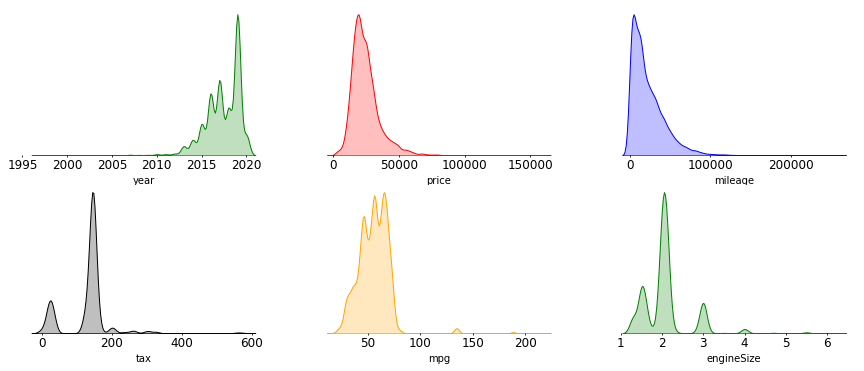

In [30]:
fig =  plt.figure(figsize = (15,6))
#fig.patch.set_facecolor('#f5f6f6')


                                                   
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.2,hspace= 0.2)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

axes=[ax0,ax1,ax2,ax3,ax4,ax5]
for ax in axes:
    ax.tick_params(axis='x',
                   labelsize = 12, which = 'major',
                   direction = 'out',pad = 2,
                   length = 1.5)
    ax.tick_params(axis='y', colors= 'black')
    ax.axes.get_yaxis().set_visible(False)
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)


        
cols = df.select_dtypes(exclude = 'object').columns

sns.kdeplot(x = df[cols[0]],color="green",fill=True,ax = ax0)
sns.kdeplot(x = df[cols[1]],color="red",fill=True,ax = ax1)
sns.kdeplot(x = df[cols[2]],color="blue",fill=True,ax = ax2)
sns.kdeplot(x = df[cols[3]],color="black",fill=True,ax = ax3)
sns.kdeplot(x = df[cols[4]],color="orange",fill=True,ax = ax4)
sns.kdeplot(x = df[cols[5]],color="green",fill=True,ax = ax5)

fig.show()


<AxesSubplot:xlabel='transmission', ylabel='price'>

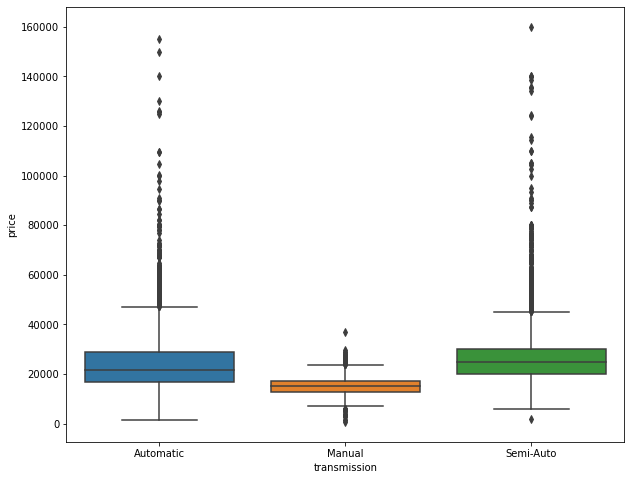

In [54]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df['transmission'], y=df['price'], data=df)

<AxesSubplot:xlabel='fuelType', ylabel='price'>

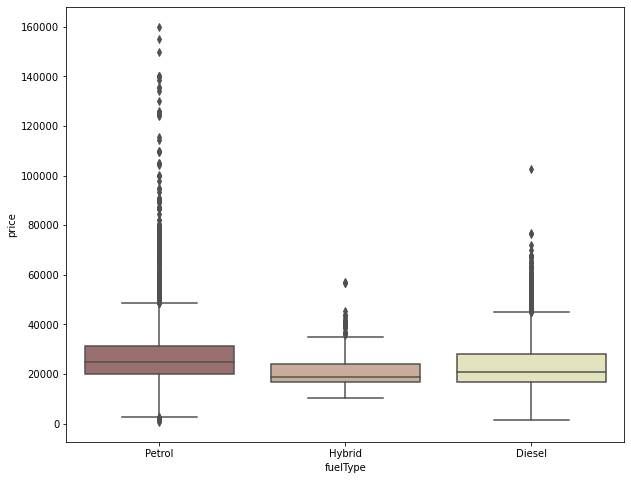

In [55]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df['fuelType'], y=df['price'], data=df, palette="pink")

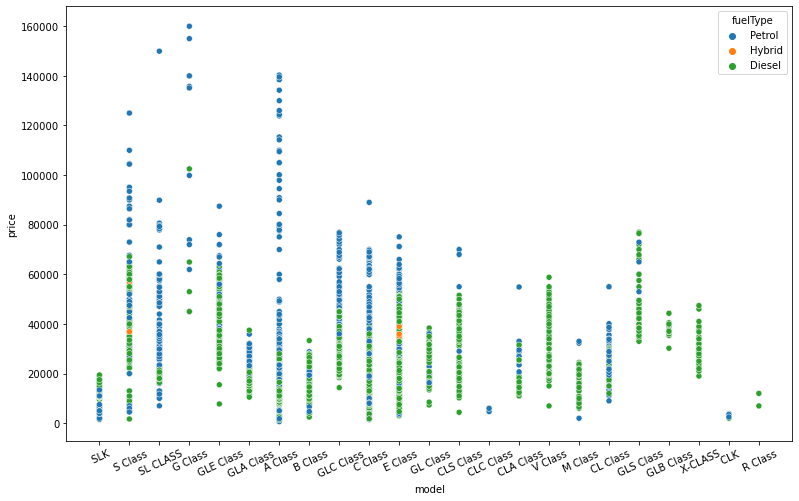

In [56]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=df['model'], y=df['price'], hue='fuelType', data=df)
plt.xticks(fontsize=10, rotation=25)

plt.show()

<Figure size 648x432 with 0 Axes>

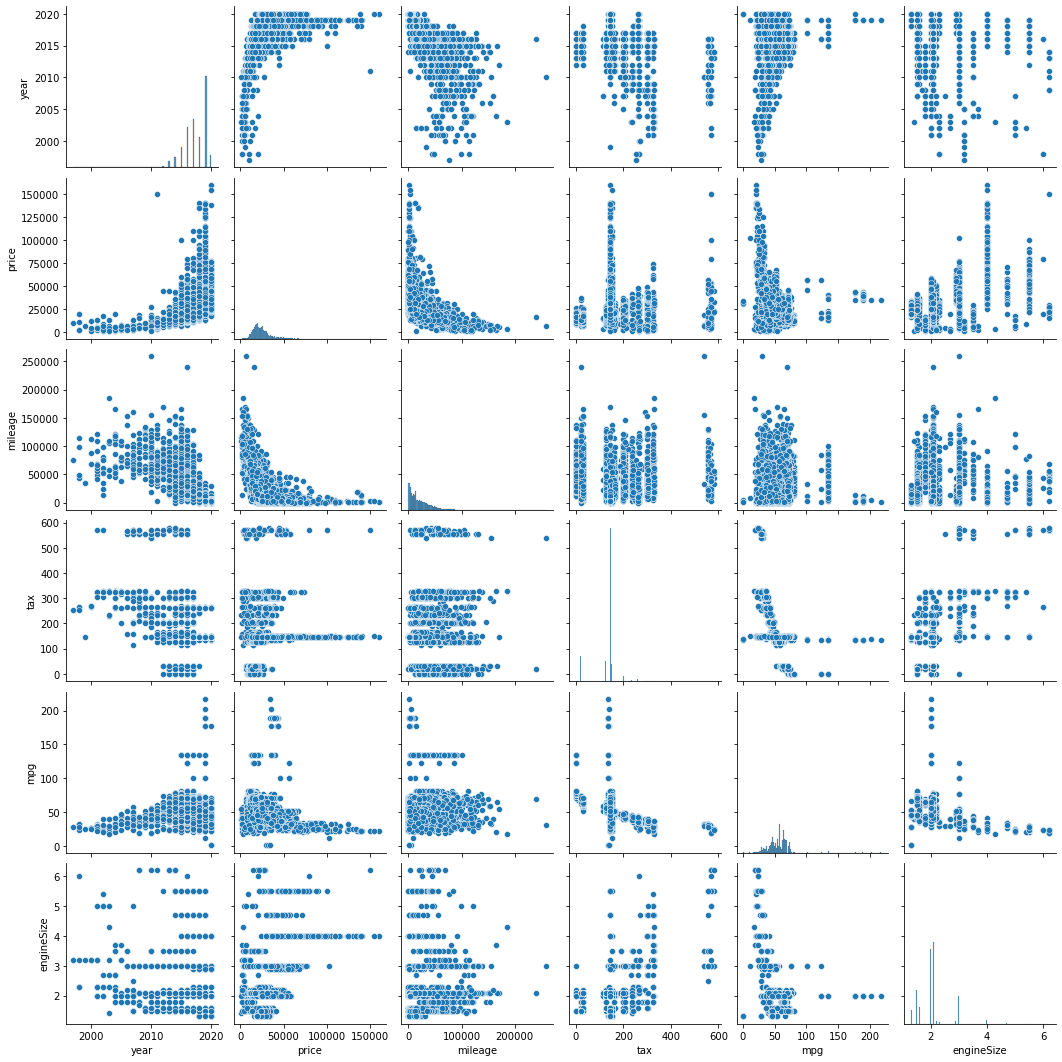

In [60]:
plt.figure(figsize=(9,6))
sns.pairplot(df)

<AxesSubplot:>

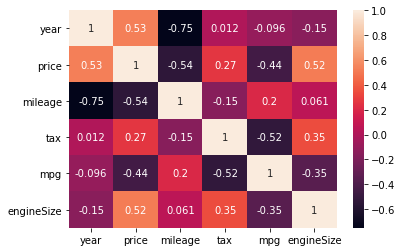

In [61]:
sns.heatmap(df.corr(),annot=True)

In [62]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [63]:
# Getting the dataset ready for machine learning

In [64]:
#encoding
df["transmission"]=df["transmission"].map({'Semi-Auto':0,'Automatic':1,'Manual':2})

In [65]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,1,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,1,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,1,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,1,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,1,4000,Petrol,325,30.1,4.0


In [66]:
df["fuelType"]=df["fuelType"].map({'Diesel':0,'Petrol':1,'Hybrid':2})

In [67]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,1,63000,1,325,32.1,1.8
1,S Class,2017,34948,1,27000,2,20,61.4,2.1
2,SL CLASS,2016,49948,1,6200,1,555,28.0,5.5
3,G Class,2016,61948,1,16000,1,325,30.4,4.0
4,G Class,2016,73948,1,4000,1,325,30.1,4.0


In [69]:
dum=pd.get_dummies(df["model"],drop_first=True)
dum2=pd.DataFrame(dum,columns=dum.columns)
df=pd.concat([df,dum2],axis=1)
df.drop("model",axis=1,inplace=True)

In [76]:
df.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,B Class,C Class,...,GLC Class,GLE Class,GLS Class,M Class,R Class,S Class,SL CLASS,SLK,V Class,X-CLASS
0,2005,5200,1,63000,1,325,32.1,1.8,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2017,34948,1,27000,2,20,61.4,2.1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2016,49948,1,6200,1,555,28.0,5.5,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2016,61948,1,16000,1,325,30.4,4.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016,73948,1,4000,1,325,30.1,4.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
X=df.drop("price",axis=1)
y=df["price"]

In [78]:
#Make a model, Linear regression

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
3501

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

In [80]:
from sklearn.metrics import mean_squared_error
mean_squared_error_lr=mean_squared_error(y_test,y_pred)
mean_squared_error_lr

33701335.93468258

In [81]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error_lr=mean_absolute_error(y_test,y_pred)
mean_absolute_error_lr

3502.0106794916155

In [82]:
import numpy as np
root_mean_squared_error_lr=np.sqrt(mean_squared_error_lr)
root_mean_squared_error_lr

5805.285172554624

In [83]:
from sklearn.metrics import r2_score
r2_score_lr=r2_score(y_test,y_pred)
r2_score_lr

0.755351810658149

In [84]:
#n =len(X_train)
#r2_adj =1- (1-r2_score)*(n-1)/(n-(13+1))
#r2_adj

In [87]:
metrics_dataframe=pd.DataFrame({"Metric":["mean_absolute_error_lr","root_mean_squared_error_lr","r2_score_lr"],"Score":[mean_absolute_error_lr, root_mean_squared_error_lr,r2_score_lr],})
metrics_dataframe

,Metric,Score
0,mean_absolute_error_lr,3502.010679
1,root_mean_squared_error_lr,5805.285173
2,r2_score_lr,0.755352


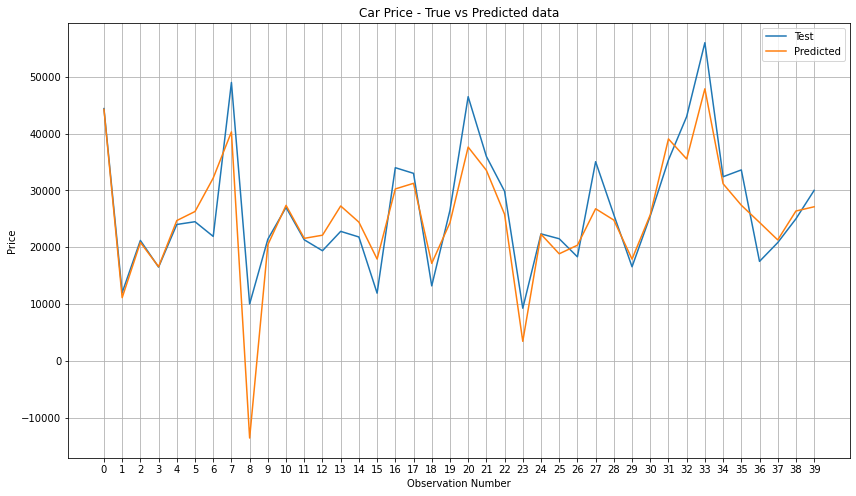

In [88]:
plt.figure(figsize=(14,8))
plt.plot(range(0,40), y_test[:40],label="Test")
plt.plot(range(0,40), y_pred[:40], label='Predicted')
plt.title("Car Price - True vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(np.arange(40))
plt.legend()
plt.grid()
plt.show()

In [ ]:
# random forest regressor

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Divide data into training and validation subsets
X_train_rf,X_test_rf,y_train_rf,y_test_rf=train_test_split(X,y,test_size=0.2,random_state=0)

model = RandomForestRegressor(n_estimators=10, random_state=0)
model.fit(X_train_rf, y_train_rf)
y_pred_rf=model.predict(X_test_rf)


In [105]:
from sklearn.metrics import mean_squared_error
mean_squared_error_rf=mean_squared_error(y_test_rf,y_pred_rf)
mean_squared_error_rf

7272079.669134532

In [106]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error_rf=mean_absolute_error(y_test_rf,y_pred_rf)
mean_absolute_error_rf

1647.1076466770508

In [107]:
import numpy as np
root_mean_squared_error_rf=np.sqrt(mean_squared_error_rf)
root_mean_squared_error_rf

2696.679378260332

In [108]:
from sklearn.metrics import r2_score
r2_score_rf=r2_score(y_test_rf,y_pred_rf)
r2_score_rf

0.9472097744952435

In [109]:
metrics_dataframe=pd.DataFrame({"Metric":["mean_absolute_error_rf","root_mean_squared_error_rf","r2_score_rf"],"Score":[mean_absolute_error_rf, root_mean_squared_error_rf,r2_score_rf],})
metrics_dataframe

,Metric,Score
0,mean_absolute_error_rf,1647.107647
1,root_mean_squared_error_rf,2696.679378
2,r2_score_rf,0.947210


Text(0, 0.5, 'RMSE')

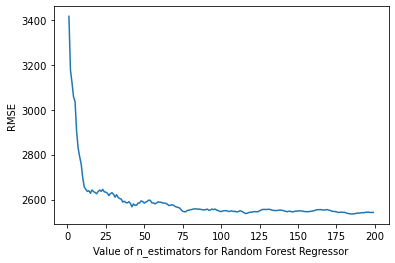

In [110]:
#Find the best n_estimators
scores =[]

for k in range(1,200):
    model_1 = RandomForestRegressor(n_estimators=k, random_state=0)
    X_train_rf1,X_test_rf1,y_train_rf1,y_test_rf1=train_test_split(X,y,test_size=0.2,random_state=0)
    model_1.fit(X_train_rf1, y_train_rf1)
    y_pred_rf1=model_1.predict(X_test_rf1)
    scores.append(np.sqrt(mean_squared_error(y_test_rf1,y_pred_rf1)))



# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1,200), scores)
plt.xlabel('Value of n_estimators for Random Forest Regressor')
plt.ylabel('RMSE')

In [74]:
#when n_estimators = 75, RMSE starts to stablize
model = RandomForestRegressor(n_estimators=75, random_state=0)
model.fit(X_train_rf, y_train_rf)
y_pred_rf=model.predict(X_test_rf)

In [80]:
from sklearn.metrics import mean_squared_error
mean_squared_error_rf=mean_squared_error(y_test_rf,y_pred_rf)
mean_squared_error_rf

6486745.906675715

In [81]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error_rf=mean_absolute_error(y_test_rf,y_pred_rf)
mean_absolute_error_rf

1586.8979645245142

In [82]:
import numpy as np
root_mean_squared_error_rf=np.sqrt(mean_squared_error_rf)
root_mean_squared_error_rf

2546.9090888124992

In [83]:
from sklearn.metrics import r2_score
r2_score_rf=r2_score(y_test_rf,y_pred_rf)
r2_score_rf

0.9529107497736996

In [85]:
metrics_dataframe_rf=pd.DataFrame({"Metric":["mean_absolute_error_rf","root_mean_squared_error_rf","r2_score_rf"],"Score":[mean_absolute_error_rf,root_mean_squared_error_rf,r2_score_rf],})
metrics_dataframe_rf

,Metric,Score
0,mean_absolute_error_rf,1586.897965
1,root_mean_squared_error_rf,2546.909089
2,r2_score_rf,0.952911


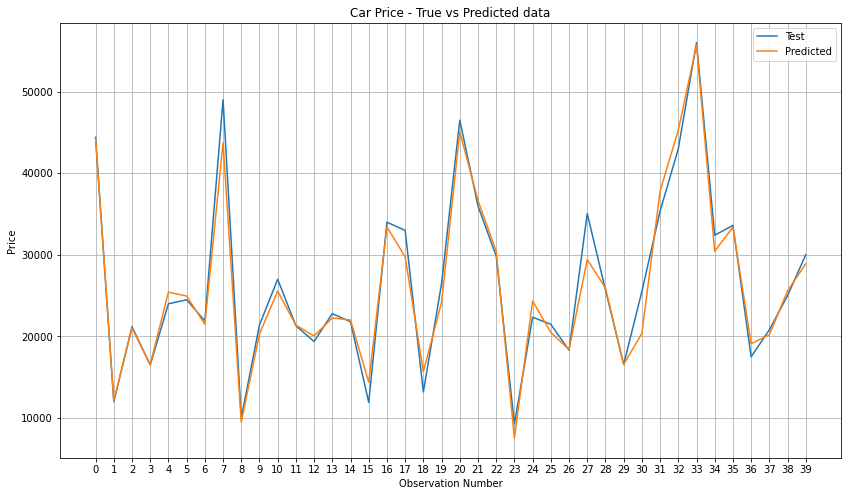

In [92]:
plt.figure(figsize=(14,8))
plt.plot(range(0,40), y_test_rf[:40],label="Test")
plt.plot(range(0,40), y_pred_rf[:40], label='Predicted')
plt.title("Car Price - True vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(np.arange(40))
plt.legend()
plt.grid()
plt.show()